In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

## Assignment

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

The KP281 is an entry-level treadmill that sells for 1,500
The KP481 is for mid-level runners and sells for 1,750
The KP781 treadmill is having advanced features, and it sells for 2,500.

In [6]:
#Import Datasets
dataset_path = "~/Documents/ds/datascience/data/aerofit_treadmill_data.csv"
df = pd.read_csv(dataset_path)

In [7]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
df.shape

(180, 9)

In [10]:
#Name of columns

In [11]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [16]:
# Datatypes of each column
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

In [15]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [25]:
df[['Age','Education','Usage','Fitness','Income','Miles']].skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

## Statistical Summary

In [29]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


## Observations:

- There are no missing values in the data.
- There are 3 unique products in the dataset.
- KP281 is the most frequent product.
- Min and max age is 18 and 50, 75% of people have age less than 33
- Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
- Out of 180 data points, 104's gender is Male and rest are the Female.
- Standard deviation for Income & Miles is very high. These variables might have outliers in them.

In [31]:
#Missing Value Detection
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [32]:
#Checking duplicate values
df.duplicated(subset=None,keep='first').sum() # No duplicate values in the dataset

0

## Non Graphical Analysis

In a non-graphical analysis, we won't plot any graphs just yet. Instead, we will use the value_counts(), nunique() and unique() functions to closer observe the nature of the data.

In [35]:
df.Product.value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [36]:
df.Gender.value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [37]:
df.MaritalStatus.value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

## Unique Attributes

In [38]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [40]:
df.Product.unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [46]:
print(df.Age.unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


In [47]:
print(df.Gender.unique())

['Male', 'Female']
Categories (2, object): ['Female', 'Male']


In [48]:
print(df.Education.unique())

[14 15 12 13 16 18 20 21]


In [49]:
print(df.MaritalStatus.unique())

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']


In [50]:
print(df.Usage.unique())

[3 2 4 5 6 7]


In [51]:
print(df.Income.unique())

[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]


In [52]:
print(df.Fitness.unique())

[4 3 2 1 5]


In [53]:
print(df.Miles.unique())

[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


## Graphical Analysis

### Univariate Analysis for Numerical Variables

Let's start our graphical analysis by generating six separate distribution plots (histograms with Kernel Density Estimation - KDE overlay), one for each column from the aerofit_df DataFrame. Each of these plots provides a graphical representation of the distribution of the values in the respective column.



### Distance Plot

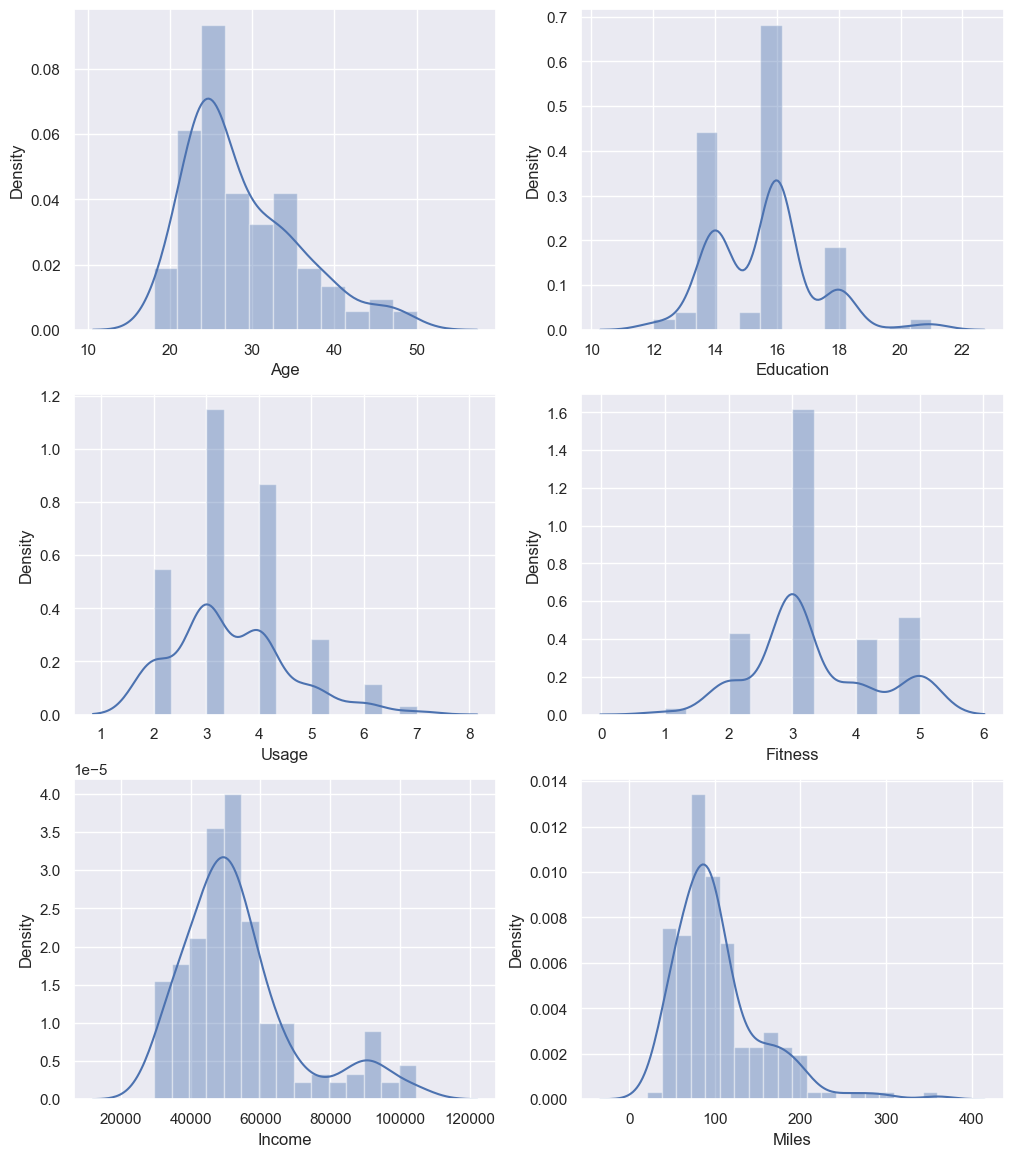

In [58]:
fig, axis = plt.subplots(nrows=3, ncols = 2, figsize = (12,10))
fig.subplots_adjust(top=1.2)

sns.distplot(df['Age'], kde=True, ax=axis[0,0])
sns.distplot(df['Education'], kde=True, ax=axis[0,1])
sns.distplot(df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(df['Income'], kde=True, ax=axis[2,0])
sns.distplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()

### Observations:

Both Miles and Income have significant outliers based on the above distribution.

Also Miles and Income are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

Customer with fitness level 3 buy a major chuck of treadmills.

Majority of Customers fall within the $ 45,000 - $ 60,000 income range

### Count Plot

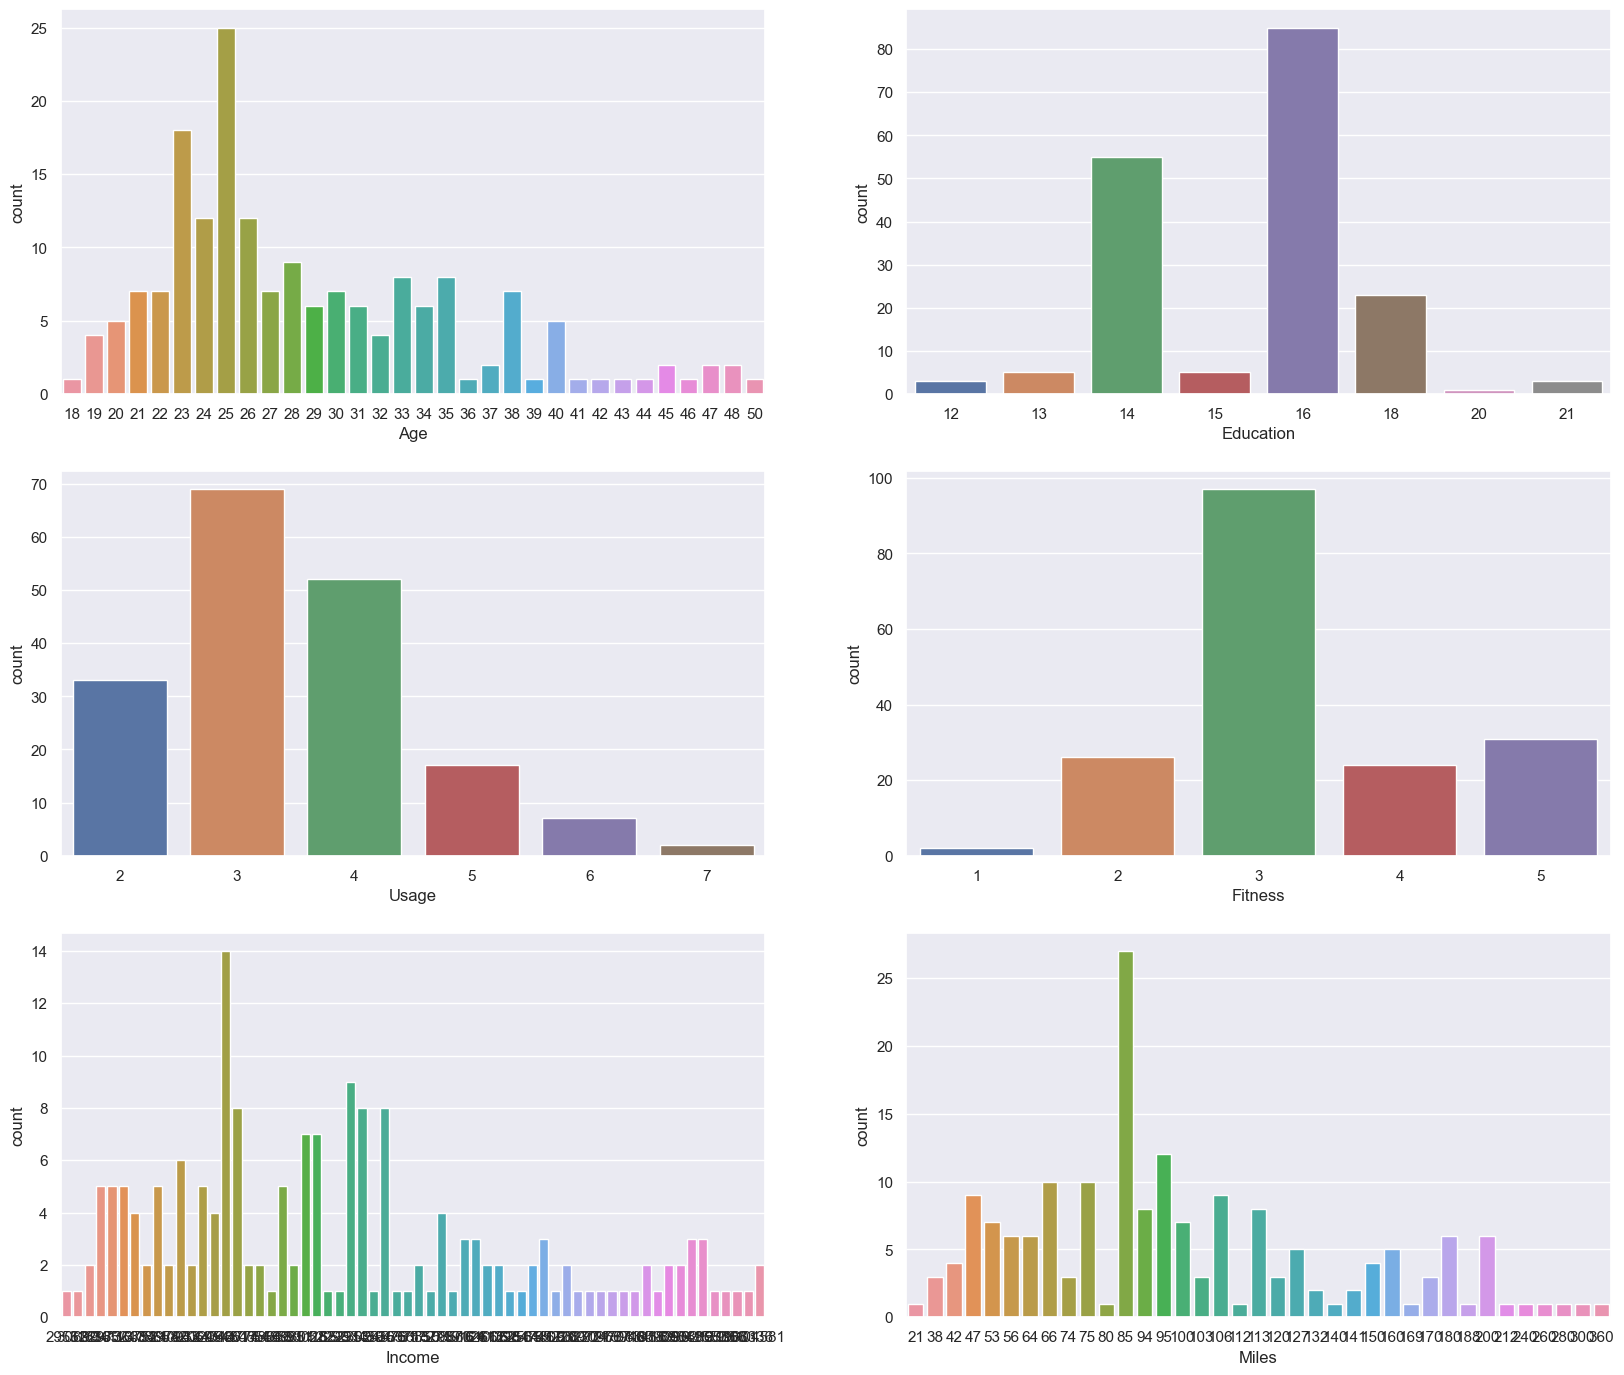

In [59]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0,0])
sns.countplot(data=df, x="Education", ax=axis[0,1])
sns.countplot(data=df, x="Usage", ax=axis[1,0])
sns.countplot(data=df, x="Fitness", ax=axis[1,1])
sns.countplot(data=df, x="Income", ax=axis[2,0])
sns.countplot(data=df, x="Miles", ax=axis[2,1])
plt.show()

### Box Plot

A box plot (also known as a box-and-whisker plot) is a statistical graphic that displays a summary of a set of data values. It's a standardized way of displaying the dataset based on a five-number summary: the minimum, the first quartile (Q1), the median (Q2), the third quartile (Q3), and the maximum.

The box in the middle represents the interquartile range (IQR), the range between the first quartile (25th percentile) and the third quartile (75th percentile).
The line inside the box represents the median (50th percentile) of the data.
The whiskers represent the variability outside the upper and lower quartiles, hence they also represent the spread of the rest of the data.
The points outside the whiskers are considered outliers and represent individual data points that are a significant distance from the rest of the data.

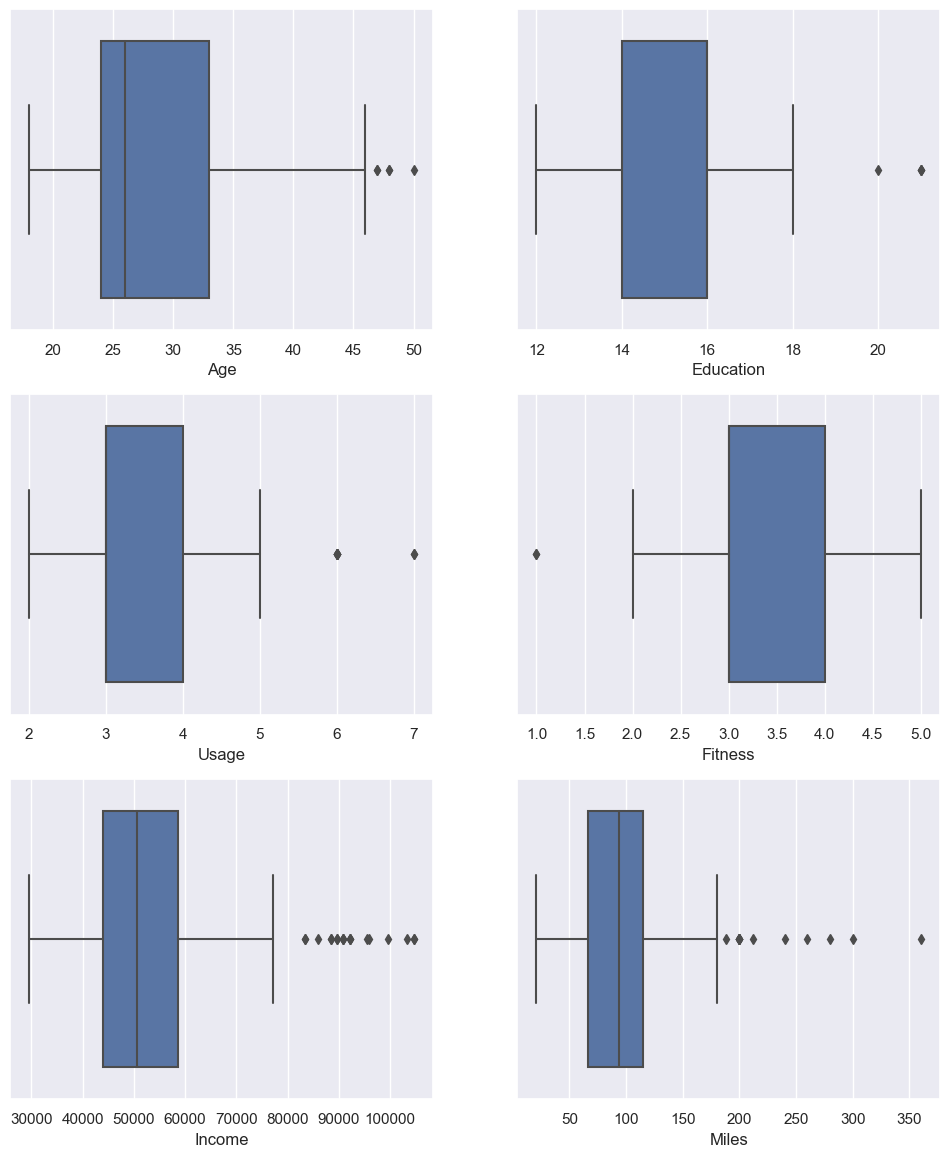

In [60]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Observations:
Age, Education, and Usage have very few outliers. While Income and Miles have more outliers.

### Univariate Anslysis - Categorical Variables

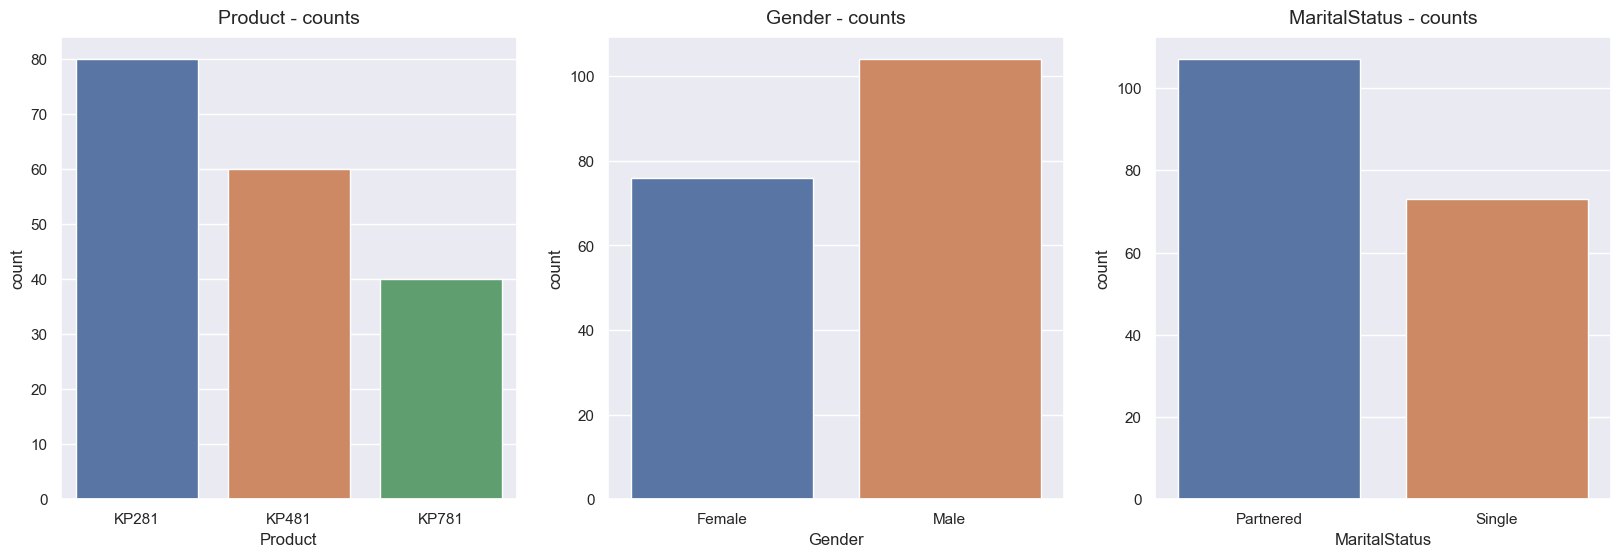

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

Observations:

KP281 is the most frequent product and best-selling product.
In Gender, there are more Males who are using treadmills than Females.
The treadmills are more likely to be purchased by partnered people

## Bivariate Analysis

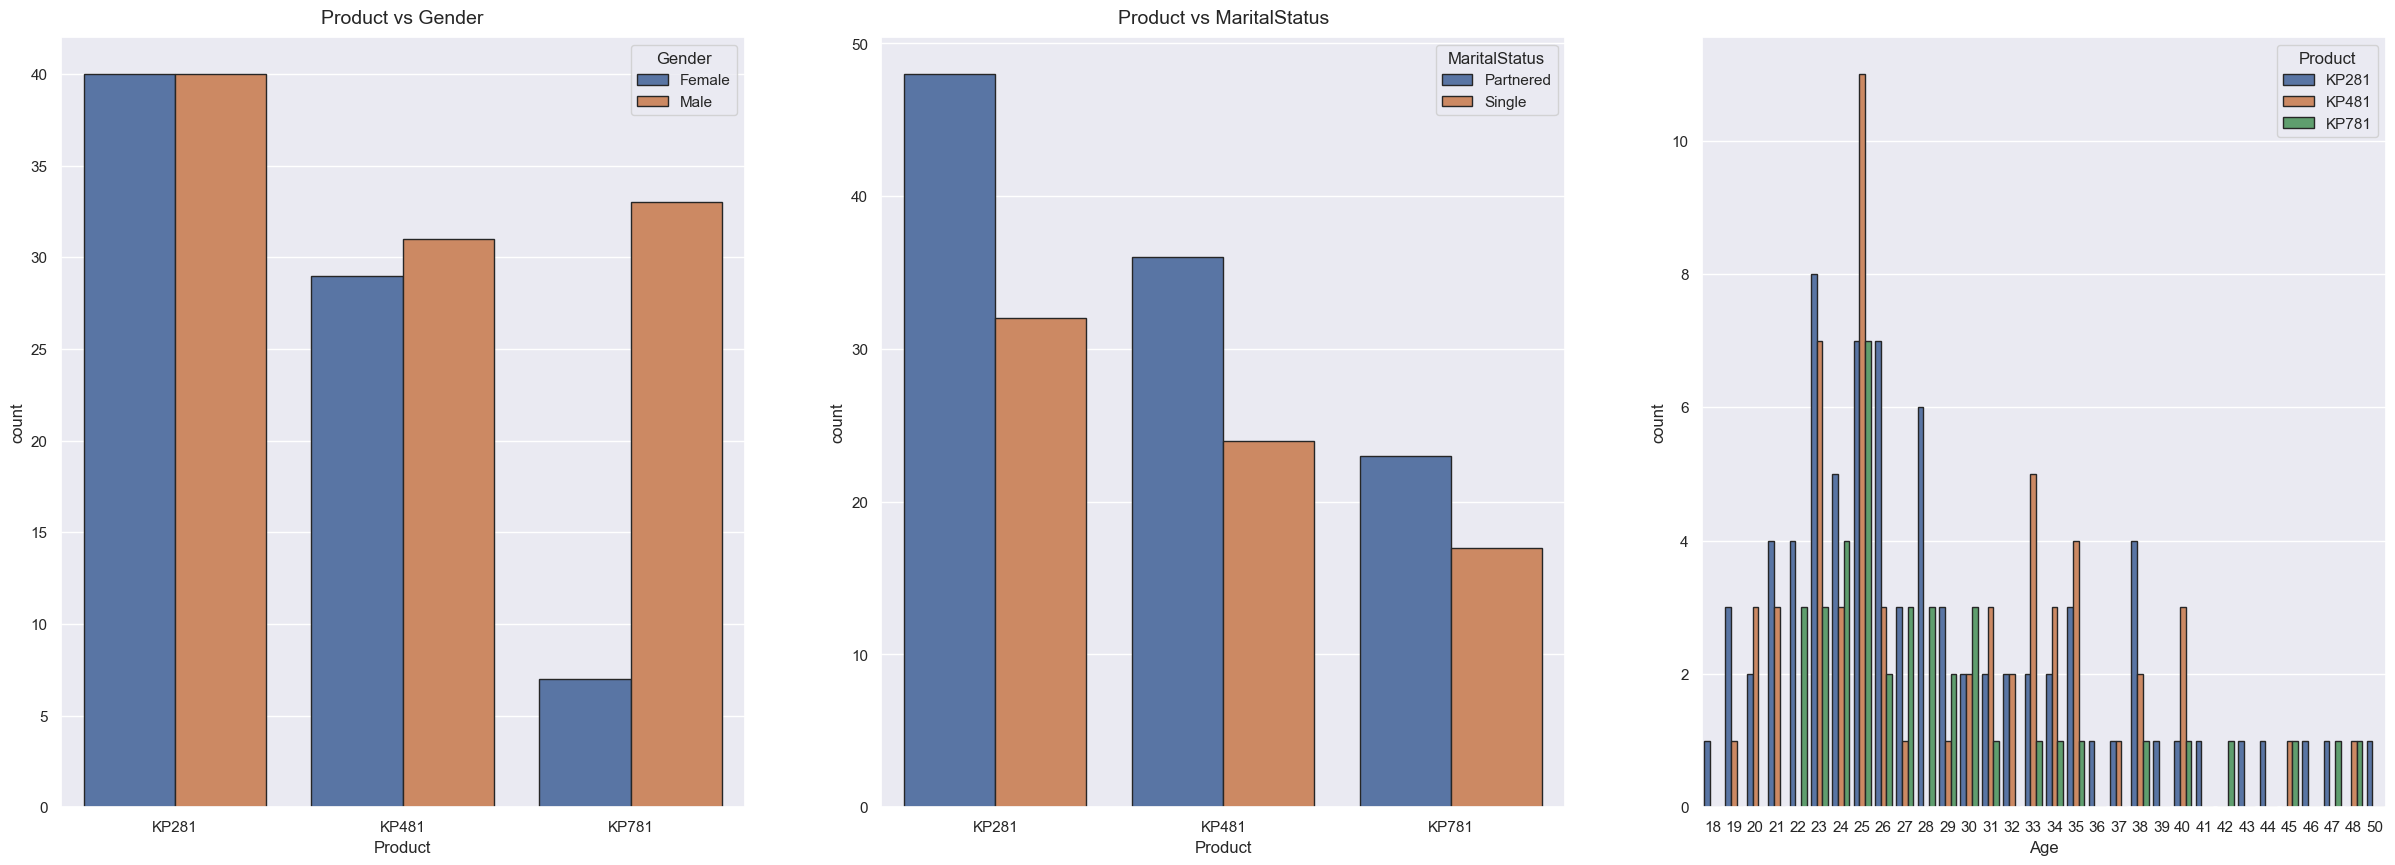

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Obervations

Product vs Gender
Equal number of males and females have purchased KP281 product and Almost same for the product KP481
Most of the Male customers have purchased the KP781 product.
Product vs MaritalStatus

Customer who is Partnered, is more likely to purchase the product.
Age vs Product

Customers with age of 25 are more likely to purchase the KP481 product.

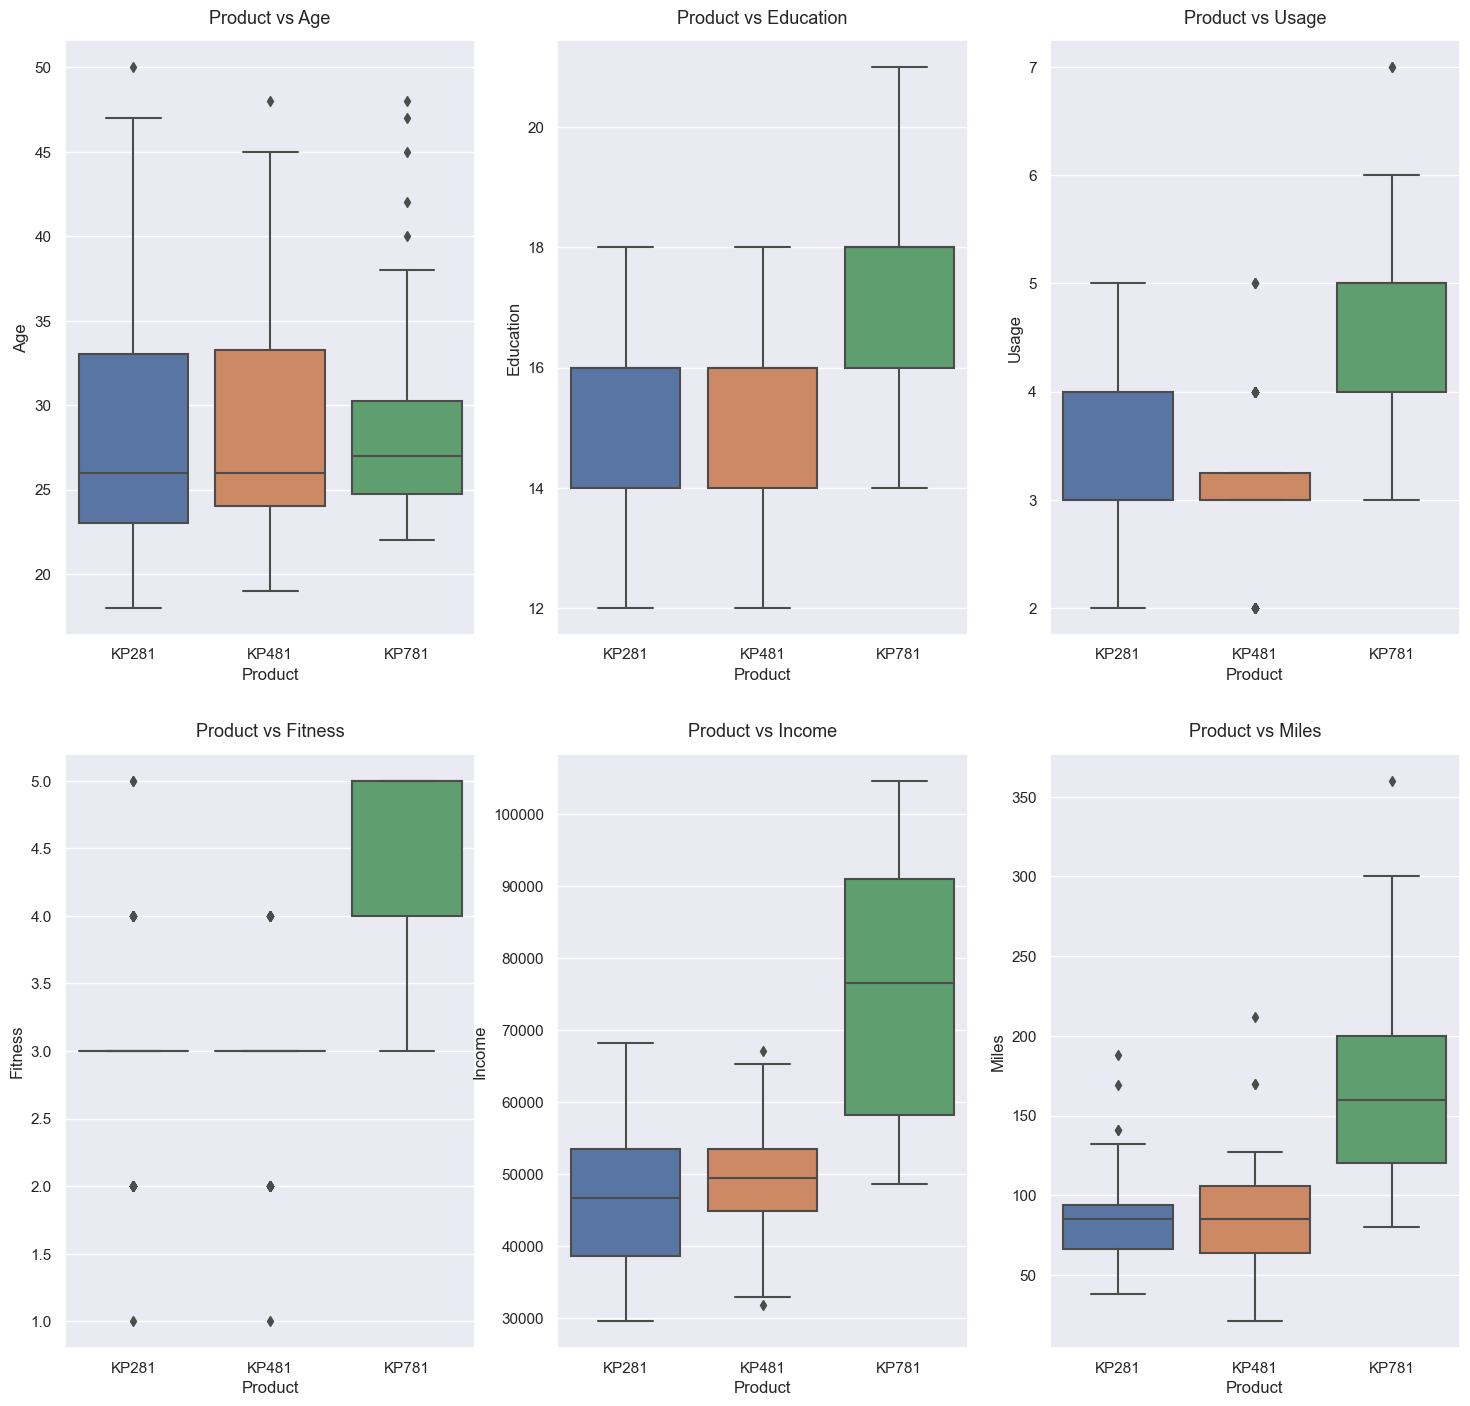

In [67]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

Observations:

Product vs Age
Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy the KP781 product

Product vs Education
Customers whose Education is greater than 16, have more chances to purchase the KP781 product.
While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

Product vs Usage
Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchase KP281 or KP481.

Product vs Fitness
The more the customer is fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.

Product vs Income
The higher the Income of the customer (Income >= 60000), the higher the chances of the customer purchasing the KP781 product.

Product vs Miles
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

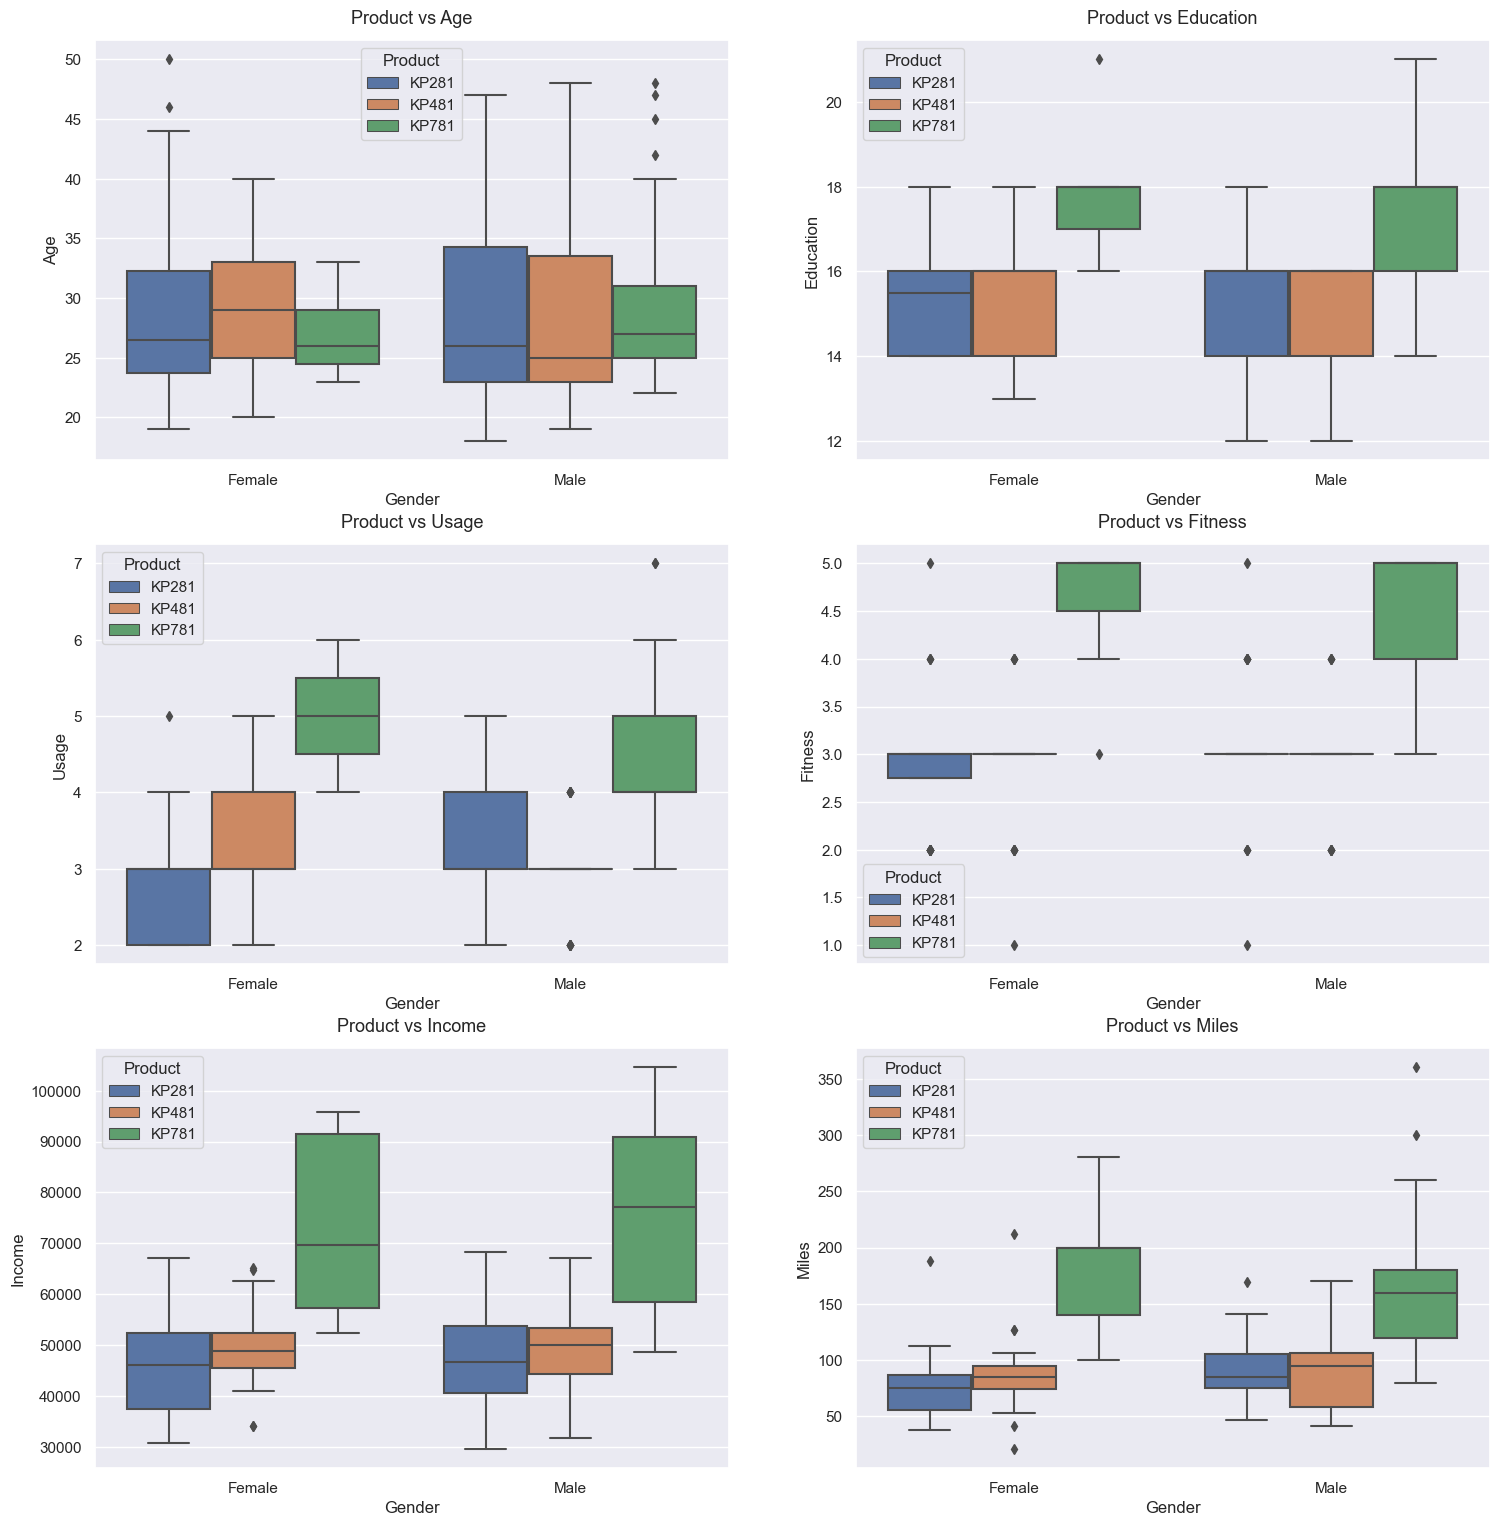

In [69]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

Obervations

Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481 product

In [76]:
df[['Age','Education']].corr()

,Age,Education
Age,1.000000,0.280496
Education,0.280496,1.000000


In [77]:
df.corr()

ValueError: could not convert string to float: 'Single'

ValueError: could not convert string to float: 'Single'

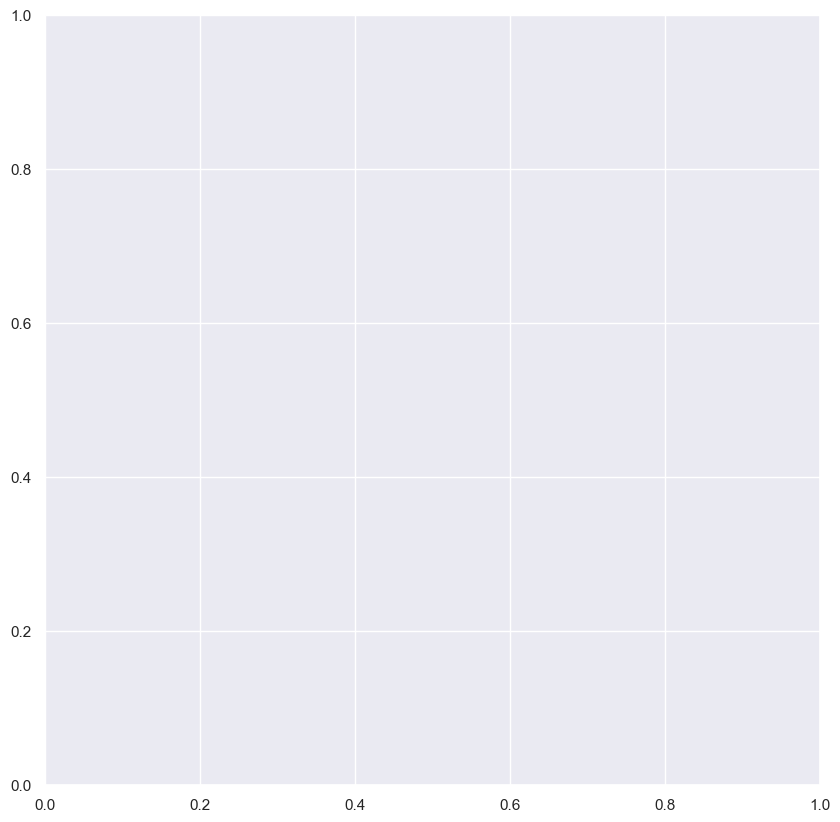

In [79]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap(df.corr(), ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.show()

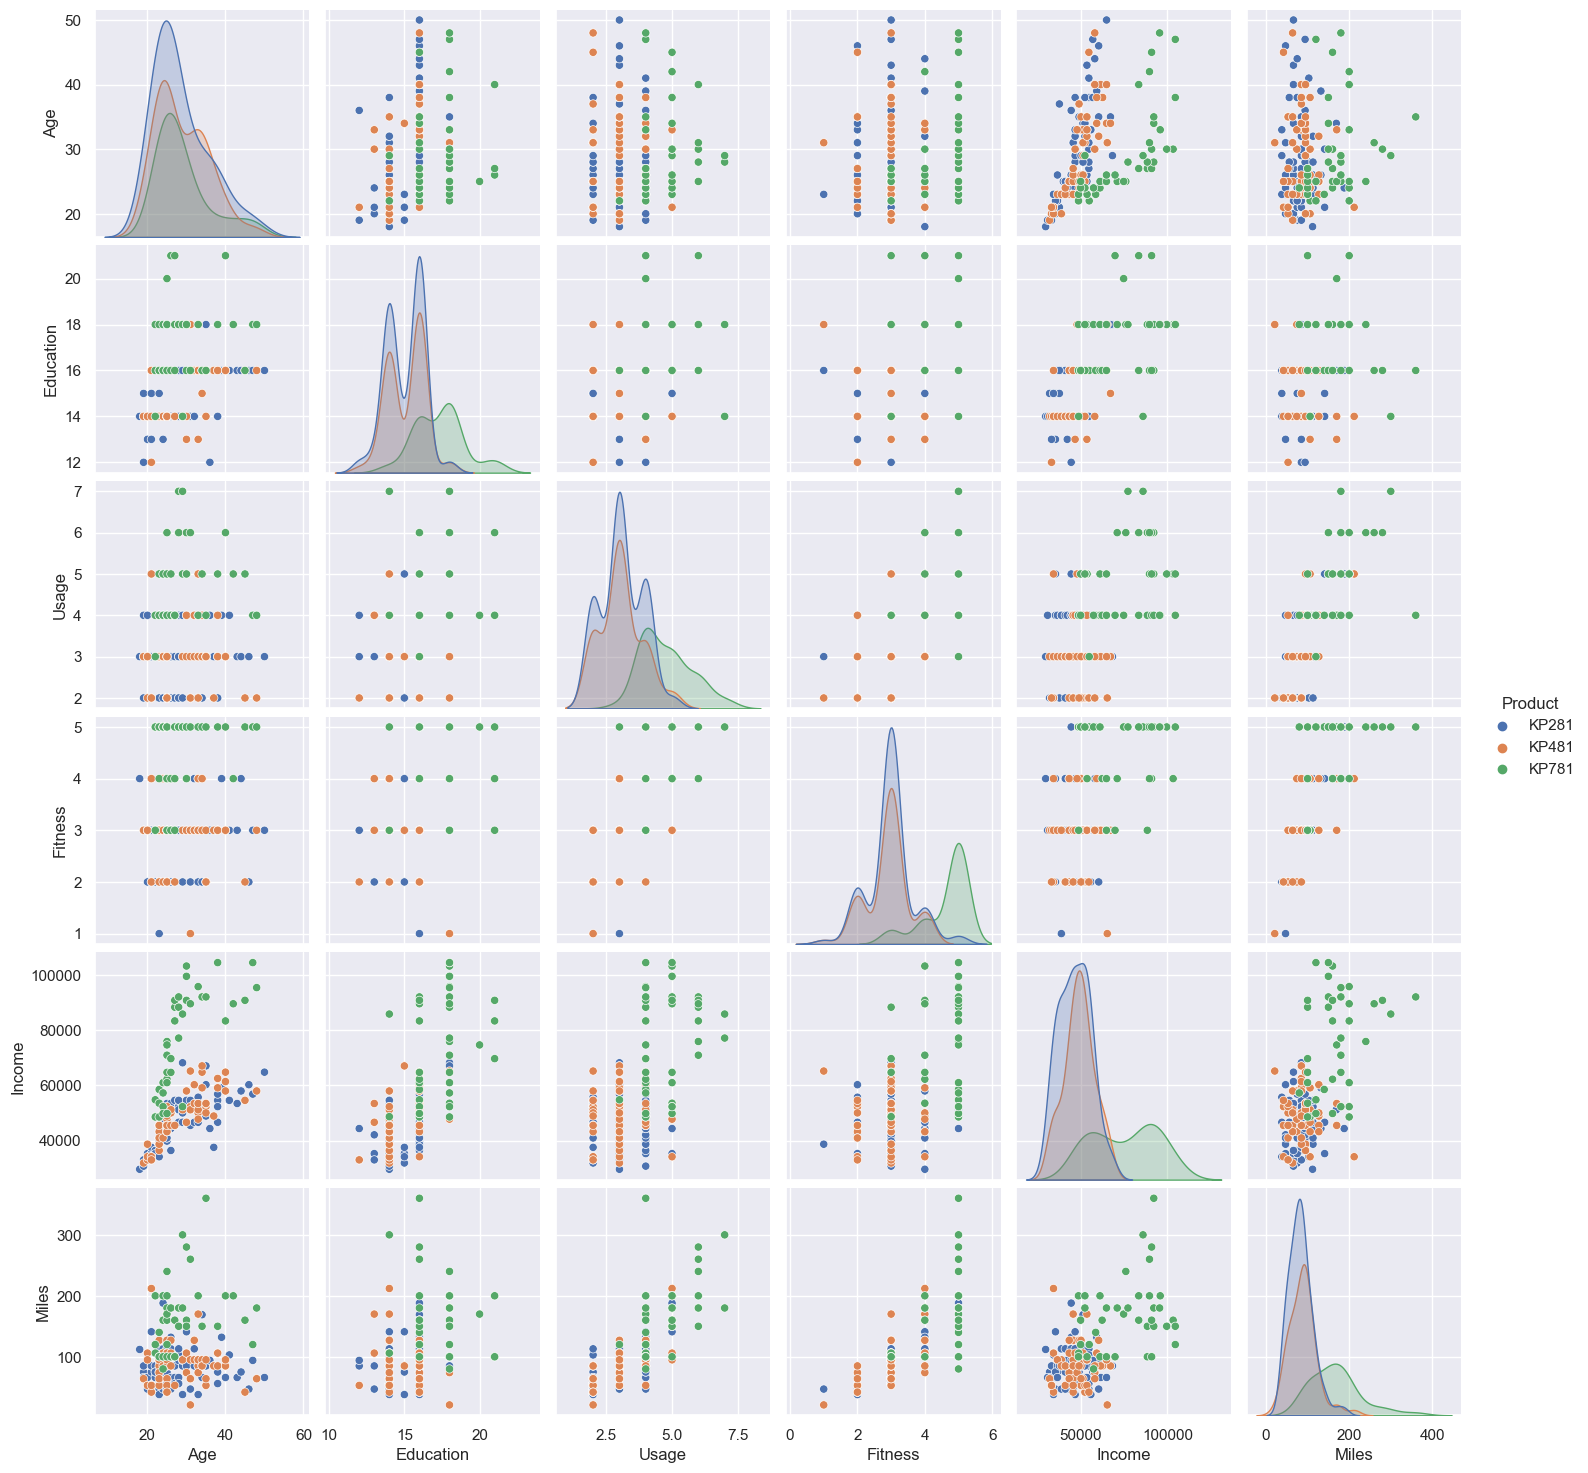

In [80]:
sns.pairplot(df, hue = "Product")
plt.show()

## Marginal & Conditional Probabilities

What percent of customers have purchased KP281, KP481, or KP781?

This code calculates the relative frequency (in percentage terms) of each category in the Product, Gender, and MaritalStatus columns of the aerofit_df DataFrame. The melt() function is used to reshape the DataFrame, converting the Product, Gender, and MaritalStatus columns into two columns: 'variable' (which contains the original column names) and 'value' (which contains the values of these columns). The resulting DataFrame provides the percentage of occurrences for each category within Product, Gender, and MaritalStatus, which can be interpreted as probabilities.

In [82]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
(df1.groupby(['variable', 'value'])[['value']].count() / len(df)).mul(100).round(3).astype(str) + '%'



value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

What is the probability of a customer based on Gender ( Male or Female ) buying a certain treadmill Product?